In [1]:
!pip install pandas numpy matplotlib scikit-learn lightgbm statsmodels joblib


In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

csv_file = next(iter(uploaded))  # first uploaded file
df = pd.read_csv(io.BytesIO(uploaded[csv_file]))
print("CSV Loaded. First 10 rows:")
df.head(10)

Saving Airline Data Cleaned with Market Analyses.csv to Airline Data Cleaned with Market Analyses.csv
CSV Loaded. First 10 rows:


,Airline,Year,Number of Employees,Liquidity Ratio,Passenger Load Factor (%),Fleet Size,Frequent Flyer Program Strength,Brand Positioning,Major Campaign Budget,Major Campaign Goal,...,ebit_currency,ask_value,ask_currency,rpk_value,rpk_currency,revenue_usd,operating_usd,fuel_usd,net_usd,ebit_usd
0,PIA,2024,6625,0.38,81.81,32,4,3,2500000.5,4,...,PKR,1.212316e+10,USD,9.918324e+09,USD,7.349921e+08,444078000.0,2.721096e+08,94330800.0,33685200.0
1,PIA,2023,7326,0.09,83.30,31,4,2,1000000.0,1,...,PKR,1.376810e+10,USD,1.146777e+10,USD,8.325896e+08,818958899.5,3.432170e+08,-365752093.0,13630746.5
2,PIA,2022,8031,0.13,80.28,29,4,2,1000000.0,1,...,PKR,1.307539e+10,USD,1.049658e+10,USD,8.257830e+08,880100366.4,2.676192e+08,-422440401.6,-54317332.8
3,PIA,2021,8558,0.14,66.89,30,4,2,1000000.0,1,...,PKR,7.681820e+09,USD,5.138222e+09,USD,5.343494e+08,627517035.0,8.332180e+07,-310629244.2,-93167592.2
4,PIA,2020,10779,0.13,74.46,30,4,1,1000000.0,3,...,PKR,8.902198e+09,USD,6.628751e+09,USD,5.699363e+08,574018230.0,1.290000e+08,-207856866.0,-4081884.0
5,PIA,2019,11740,0.16,81.31,31,4,2,1000000.0,1,...,PKR,1.837158e+10,USD,1.493824e+10,USD,NaN,NaN,NaN,NaN,NaN
6,EMIRATES,2024,63466,35.40,79.90,260,5,5,50000010.0,4,...,USD,3.447200e+11,USD,3.447200e+11,USD,1.212210e+11,34184.0,3.418400e+10,17233.0,37563.0
7,EMIRATES,2023,56379,34.80,79.50,260,5,5,10000002.5,4,...,USD,2.840440e+11,USD,2.840440e+11,USD,1.073560e+11,33664.0,3.366400e+10,17233.0,33266.0
8,EMIRATES,2022,45843,35.30,58.60,262,5,5,10000002.5,4,...,USD,1.599620e+11,USD,1.599620e+11,USD,5.918000e+10,13855.0,1.385500e+10,3917.0,17728.0
9,EMIRATES,2021,40801,48.90,44.30,259,5,5,50000010.0,4,...,USD,6.406200e+10,USD,6.406200e+10,USD,3.092700e+10,6398.0,6.398000e+09,20279.0,4644.0


In [3]:
print("\nColumns available:")
print(df.columns.tolist())



Columns available:
['Airline', 'Year', 'Number of Employees', 'Liquidity Ratio', 'Passenger Load Factor (%)', 'Fleet Size', 'Frequent Flyer Program Strength', 'Brand Positioning', 'Major Campaign Budget', 'Major Campaign Goal', 'Sponsorship Categories', 'Customer Experience Rating', 'Total Followers', 'Engagement Rate', 'Posting Frequency', 'Tone (formal/casual/humorous)', 'Unnamed: 28', 'revenue_value', 'revenue_currency', 'operating_value', 'operating_currency', 'fuel_value', 'fuel_currency', 'net_value', 'net_currency', 'ebit_value', 'ebit_currency', 'ask_value', 'ask_currency', 'rpk_value', 'rpk_currency', 'revenue_usd', 'operating_usd', 'fuel_usd', 'net_usd', 'ebit_usd']


In [4]:
TARGET = 'revenue_usd'
TIME_COL = 'Year'
GROUP_COL = 'Airline'
MARKET_COL = 'Major Campaign Budget' if 'Major Campaign Budget' in df.columns else None

print(f"\nTarget: {TARGET}")
print(f"Time column: {TIME_COL}")
print(f"Airline column: {GROUP_COL}")
print(f"Marketing column: {MARKET_COL}")


Target: revenue_usd
Time column: Year
Airline column: Airline
Marketing column: Major Campaign Budget


In [36]:
df[TIME_COL] = pd.to_numeric(df[TIME_COL], errors='coerce')
df[TARGET] = pd.to_numeric(df[TARGET], errors='coerce').fillna(0)
if MARKET_COL:
    df[MARKET_COL] = pd.to_numeric(df[MARKET_COL], errors='coerce').fillna(0)

# Diagnostic prints to check DataFrame state
print(f"NaNs in {TIME_COL} before final dropna: {df[TIME_COL].isnull().sum()}")
print(f"NaNs in {TARGET} before final dropna: {df[TARGET].isnull().sum()}")
print(f"Length of df before final dropna: {len(df)}")

df = df.dropna(subset=[TIME_COL, TARGET])

print(f"Length of df after final dropna: {len(df)}")
print(f"Number of unique airlines in df after final dropna: {df[GROUP_COL].nunique()}")

NaNs in Year before final dropna: 0
NaNs in revenue_usd before final dropna: 0
Length of df before final dropna: 24
Length of df after final dropna: 24
Number of unique airlines in df after final dropna: 4


In [39]:
def create_panel_features(df, time_col, group_col, target, market_col=None, max_lag=3):
    rows = []
    for name, grp in df.groupby(group_col):
        g = grp.sort_values(time_col).copy()
        # Convert to year-end date so it aligns with 'YE' frequency
        g['_date'] = pd.to_datetime(g[time_col].astype(int).astype(str) + '-12-31')
        g = g.set_index('_date')

        # Use asfreq to ensure yearly frequency, filling missing years with NaNs
        # The 'YE' alias should match the _date index
        g = g.asfreq('YE')

        # Forward fill the target (revenue_usd) AFTER asfreq
        g[target] = g[target].ffill()

        # Fill market_col NaNs with 0 if column exists
        if market_col and market_col in g.columns:
            g[market_col] = g[market_col].fillna(0)

        # Create lags and rolling features
        for l in range(1, max_lag+1):
            g[f'lag_{l}'] = g[target].shift(l)
        g['rolling_2'] = g[target].rolling(2, min_periods=1).mean()

        g[group_col] = name # Re-add group_col as it might be lost during reindex if not in original df
        g['year'] = g.index.year
        rows.append(g.reset_index())

    panel = pd.concat(rows, ignore_index=True, sort=False)
    # Don't dropna(subset=['lag_1']) here, let the modeling loop filter
    # This ensures that even airlines with few observations still appear in panel
    return panel

panel = create_panel_features(df, TIME_COL, GROUP_COL, TARGET, MARKET_COL)
print("\nFeature-engineered panel (first 10 rows):")
panel.head(10)


Feature-engineered panel (first 10 rows):


,_date,Airline,Year,Number of Employees,Liquidity Ratio,Passenger Load Factor (%),Fleet Size,Frequent Flyer Program Strength,Brand Positioning,Major Campaign Budget,...,revenue_usd,operating_usd,fuel_usd,net_usd,ebit_usd,lag_1,lag_2,lag_3,rolling_2,year
0,2019-12-31,EMIRATES,2019,60282,17.40,76.80,270,5,5,100000000.0,...,9.790700e+10,30768.0,3.076800e+10,871.0,25852.0,NaN,NaN,NaN,9.790700e+10,2019
1,2020-12-31,EMIRATES,2020,60033,22.00,78.50,270,5,5,50000010.0,...,9.197200e+10,26260.0,2.626000e+10,1056.0,25852.0,9.790700e+10,NaN,NaN,9.493950e+10,2020
2,2021-12-31,EMIRATES,2021,40801,48.90,44.30,259,5,5,50000010.0,...,3.092700e+10,6398.0,6.398000e+09,20279.0,4644.0,9.197200e+10,9.790700e+10,NaN,6.144950e+10,2021
3,2022-12-31,EMIRATES,2022,45843,35.30,58.60,262,5,5,10000002.5,...,5.918000e+10,13855.0,1.385500e+10,3917.0,17728.0,3.092700e+10,9.197200e+10,9.790700e+10,4.505350e+10,2022
4,2023-12-31,EMIRATES,2023,56379,34.80,79.50,260,5,5,10000002.5,...,1.073560e+11,33664.0,3.366400e+10,17233.0,33266.0,5.918000e+10,3.092700e+10,9.197200e+10,8.326800e+10,2023
5,2024-12-31,EMIRATES,2024,63466,35.40,79.90,260,5,5,50000010.0,...,1.212210e+11,34184.0,3.418400e+10,17233.0,37563.0,1.073560e+11,5.918000e+10,3.092700e+10,1.142885e+11,2024
6,2019-12-31,PIA,2019,11740,0.16,81.31,31,4,2,1000000.0,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2019
7,2020-12-31,PIA,2020,10779,0.13,74.46,30,4,1,1000000.0,...,5.699363e+08,574018230.0,1.290000e+08,-207856866.0,-4081884.0,0.000000e+00,NaN,NaN,2.849682e+08,2020
8,2021-12-31,PIA,2021,8558,0.14,66.89,30,4,2,1000000.0,...,5.343494e+08,627517035.0,8.332180e+07,-310629244.2,-93167592.2,5.699363e+08,0.000000e+00,NaN,5.521429e+08,2021
9,2022-12-31,PIA,2022,8031,0.13,80.28,29,4,2,1000000.0,...,8.257830e+08,880100366.4,2.676192e+08,-422440401.6,-54317332.8,5.343494e+08,5.699363e+08,0.000000e+00,6.800662e+08,2022


In [59]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import lightgbm as lgb
import joblib

airlines = panel[GROUP_COL].unique()
models_info = []
forecasts = []

max_lag = 3 # Define max_lag here to be accessible for forecasting

def mape(a, b):
    a, b = np.array(a), np.array(b)
    mask = a != 0
    return np.mean(np.abs((a[mask] - b[mask]) / a[mask])) * 100 if mask.sum() > 0 else np.nan
for a in airlines:
    sub = panel[panel[GROUP_COL] == a].sort_values('year')
    n = len(sub)

    if n < 6:
        continue

    features = [c for c in sub.columns if c.startswith('lag_') or c.startswith('rolling_')]
    if MARKET_COL:
        features.append(MARKET_COL)

    X = sub[features].dropna()
    y = sub[TARGET].loc[X.index] # Ensure y aligns with X after dropping NaNs

    if len(X) == 0:
        print(f"Skipping airline {a} due to no valid feature data after dropping NaNs.")
        continue

    split = max(1, int(len(X) * 0.75))
    X_train, X_test = X.iloc[:split], X.iloc[split:]
    y_train, y_test = y.iloc[:split], y.iloc[split:]

    if len(X_train) == 0 or len(X_test) == 0:
        print(f"Skipping airline {a} due to insufficient data for train/test split.")
        continue

    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred_r = ridge.predict(X_test)

    lgb_train = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
    params = {'objective': 'regression', 'metric': 'rmse', 'verbosity': -1}
    bst = lgb.train(params, lgb_train, num_boost_round=200, valid_sets=[lgb_train],
                    callbacks=[lgb.early_stopping(20, verbose=False)])
    y_pred_lgb = bst.predict(X_test)

    metrics = {
        'ridge_mae': mean_absolute_error(y_test, y_pred_r),
        'ridge_rmse': np.sqrt(mean_squared_error(y_test, y_pred_r)),
        'ridge_mape': mape(y_test, y_pred_r),
        'lgb_mae': mean_absolute_error(y_test, y_pred_lgb),
        'lgb_rmse': np.sqrt(mean_squared_error(y_test, y_pred_lgb)),
        'lgb_mape': mape(y_test, y_pred_lgb)
    }
    print(f"Metrics for {a}: {metrics}")

    joblib.dump(ridge, f"model_ridge_{a.replace('/','_')}.pkl")
    joblib.dump(bst, f"model_lgb_{a.replace('/','_')}.pkl")

    models_info.append({'airline': a, 'n': n, 'ridge': ridge, 'lgb': bst, 'features': features, 'metrics': metrics})

    last_window = sub.set_index(pd.to_datetime(sub['year'].astype(str) + '-01-01')).iloc[-5:]
    current = last_window.copy()

    for h in range(1, 4):
        next_year = current.index[-1] + pd.DateOffset(years=1)
        row = {}
        for l in range(1, max_lag+1):
            row[f'lag_{l}'] = current[TARGET].shift(l).iloc[-1] if len(current) >= l else current[TARGET].iloc[-1]
        row['rolling_2'] = current[TARGET].rolling(2, min_periods=1).mean().iloc[-1]
        if MARKET_COL:
            row[MARKET_COL] = current.get(MARKET_COL, pd.Series([0])).iloc[-1] if MARKET_COL in current.columns else 0

        Xpred = pd.DataFrame([row], index=[next_year])
        Xpred = Xpred.reindex(columns=features, fill_value=0)
        yhat = bst.predict(Xpred)[0]

        newrow = Xpred.copy()
        newrow[TARGET] = yhat
        current = pd.concat([current, pd.DataFrame([newrow.iloc[0]], index=[next_year])]) # Fix concat issue

        forecasts.append({'airline': a, 'year': next_year.year, 'forecast_revenue_usd': float(yhat)})

fc = pd.DataFrame(forecasts)
if not fc.empty:
    fc.to_csv('airline_forecasts.csv', index=False)
    print("\nForecasts saved as 'airline_forecasts.csv'. First 10 rows:")
    print(fc.head(10))
else:
    print("No forecasts generated. Check model training and data availability.")

import statsmodels.formula.api as smf

# Create a copy of the panel for OLS and rename columns to avoid issues with spaces
panel_for_ols = panel.copy()
local_market_col_name = MARKET_COL
if local_market_col_name and ' ' in local_market_col_name:
    new_market_col_for_ols = local_market_col_name.replace(' ', '_')
    panel_for_ols = panel_for_ols.rename(columns={local_market_col_name: new_market_col_for_ols})
    local_market_col_name = new_market_col_for_ols

# Ensure that the panel DataFrame is not empty and contains the necessary columns
# Also check for the (potentially new) local_market_col_name in panel_for_ols.columns
if not panel_for_ols.empty and TARGET in panel_for_ols.columns and (local_market_col_name is None or local_market_col_name in panel_for_ols.columns):
    # Construct formula with the (potentially renamed) local_market_col_name
    # Simplified formula to address 'covariance of constraints does not have full rank' warning
    formula = f"{TARGET} ~ {local_market_col_name} + lag_1 + C({GROUP_COL})" if local_market_col_name else f"{TARGET} ~ lag_1 + C({GROUP_COL})"
    try:
        res = smf.ols(formula, data=panel_for_ols.dropna(subset=[TARGET, 'lag_1'])).fit(cov_type='HC3')

        print("\nMarketing impact model summary:")
        print(res.summary())

        if local_market_col_name:
            coef = res.params.get(local_market_col_name, None)
            # Fixed f-string to print the actual coefficient value
            print(f"\nEstimated effect of marketing budget on revenue: coef={coef}")
    except Exception as e:
        print(f"Error fitting marketing impact model: {e}")
else:
    print("Cannot fit marketing impact model: panel DataFrame is empty or missing required columns.")

Metrics for EMIRATES: {'ridge_mae': 4389142189.535324, 'ridge_rmse': np.float64(4389142189.535324), 'ridge_mape': np.float64(3.620777084445207), 'lgb_mae': 37953002304.0, 'lgb_rmse': np.float64(37953002304.0), 'lgb_mape': np.float64(31.308933521419558)}
Metrics for PIA: {'ridge_mae': 97040830.49550939, 'ridge_rmse': np.float64(97040830.49550939), 'ridge_mape': np.float64(13.202976651613643), 'lgb_mae': 94194272.80000007, 'lgb_rmse': np.float64(94194272.80000007), 'lgb_mape': np.float64(12.815685708209982)}
Metrics for SINGAPORE AIRLINES: {'ridge_mae': 3469022149.7152023, 'ridge_rmse': np.float64(3469022149.7152023), 'ridge_mape': np.float64(24.656507333968392), 'lgb_mae': 4751394288.0, 'lgb_rmse': np.float64(4751394288.0), 'lgb_mape': np.float64(33.77112715128252)}
Metrics for TURKISH AIRLINES: {'ridge_mae': 1110731296.2571564, 'ridge_rmse': np.float64(1110731296.2571564), 'ridge_mape': np.float64(4.899780741352315), 'lgb_mae': 2985000256.0, 'lgb_rmse': np.float64(2985000256.0), 'lgb_m

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/lightgbm/callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=7.38579e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/lightgbm/callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packa

In [53]:
fc = pd.DataFrame(forecasts)
fc.to_csv('airline_forecasts.csv', index=False)
print("\nForecasts saved as 'airline_forecasts.csv'. First 10 rows:")
fc.head(10)



Forecasts saved as 'airline_forecasts.csv'. First 10 rows:


,airline,year,forecast_revenue_usd
0,EMIRATES,2025,8.326800e+10
1,EMIRATES,2026,8.326800e+10
2,EMIRATES,2027,8.326800e+10
3,PIA,2025,8.291863e+08
4,PIA,2026,8.291863e+08
5,PIA,2027,8.291863e+08
6,SINGAPORE AIRLINES,2025,9.318004e+09
7,SINGAPORE AIRLINES,2026,9.318004e+09
8,SINGAPORE AIRLINES,2027,9.318004e+09
9,TURKISH AIRLINES,2025,1.968400e+10


In [57]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=fc)

https://docs.google.com/spreadsheets/d/1uhBkpCyNtWYnuiwbDuhnjymwZzfDQ37kwDcfTV1RR3w/edit#gid=0


In [60]:
import statsmodels.formula.api as smf

# Create a copy of the panel for OLS and rename columns to avoid issues with spaces
panel_for_ols = panel.copy()
local_market_col_name = MARKET_COL
if local_market_col_name and ' ' in local_market_col_name:
    new_market_col_for_ols = local_market_col_name.replace(' ', '_')
    panel_for_ols = panel_for_ols.rename(columns={local_market_col_name: new_market_col_for_ols})
    local_market_col_name = new_market_col_for_ols

# Ensure that the panel DataFrame is not empty and contains the necessary columns
if not panel_for_ols.empty and TARGET in panel_for_ols.columns and (local_market_col_name is None or local_market_col_name in panel_for_ols.columns):
    formula = f"{TARGET} ~ {local_market_col_name} + lag_1 + lag_2 + lag_3 + C({GROUP_COL})" if local_market_col_name else f"{TARGET} ~ lag_1 + lag_2 + lag_3 + C({GROUP_COL})"
    try:
        res = smf.ols(formula, data=panel_for_ols.dropna(subset=[TARGET, 'lag_1'])).fit(cov_type='HC3')

        print("\nMarketing impact model summary:")
        print(res.summary())

        if local_market_col_name:
            coef = res.params.get(local_market_col_name, None)
            print(f"\nEstimated effect of marketing budget on revenue: coef={coef}")
    except Exception as e:
        print(f"Error fitting marketing impact model: {e}")
else:
    print("Cannot fit marketing impact model: panel DataFrame is empty or missing required columns.")


Marketing impact model summary:
                            OLS Regression Results                            
Dep. Variable:            revenue_usd   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                    0.6632
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.617
Time:                        00:42:04   Log-Likelihood:                -262.42
No. Observations:                  12   AIC:                             540.8
Df Residuals:                       4   BIC:                             544.7
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  warnings.warn('covariance of constraints does not have full '


### Dataset Summary ###
              Airline  years_of_data   avg_revenue   max_revenue   min_revenue
0            EMIRATES              6  8.476050e+10  1.212210e+11  3.092700e+10
1                 PIA              6  5.829418e+08  8.325896e+08  0.000000e+00
2  SINGAPORE AIRLINES              6  7.838649e+09  1.406940e+10  0.000000e+00
3    TURKISH AIRLINES              6  1.544767e+10  2.266900e+10  6.734000e+09


/tmp/ipython-input-449385095.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=airline_summary, x='Airline', y='avg_revenue', palette='Blues_d')


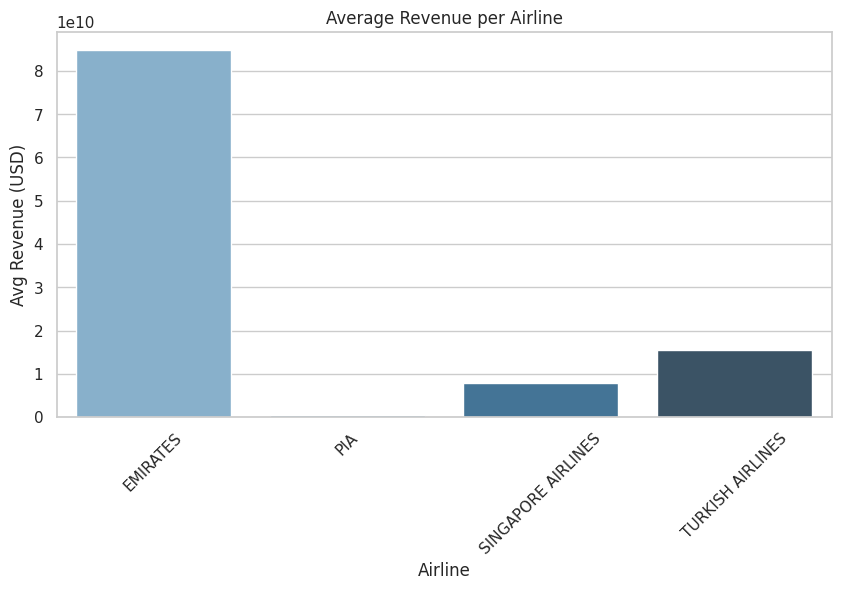


### Feature-Engineered Panel Sample ###


,_date,Airline,Year,Number of Employees,Liquidity Ratio,Passenger Load Factor (%),Fleet Size,Frequent Flyer Program Strength,Brand Positioning,Major Campaign Budget,...,revenue_usd,operating_usd,fuel_usd,net_usd,ebit_usd,lag_1,lag_2,lag_3,rolling_2,year
0,2019-12-31,EMIRATES,2019,60282,17.40,76.80,270,5,5,100000000.0,...,9.790700e+10,30768.0,3.076800e+10,871.0,25852.0,NaN,NaN,NaN,9.790700e+10,2019
1,2020-12-31,EMIRATES,2020,60033,22.00,78.50,270,5,5,50000010.0,...,9.197200e+10,26260.0,2.626000e+10,1056.0,25852.0,9.790700e+10,NaN,NaN,9.493950e+10,2020
2,2021-12-31,EMIRATES,2021,40801,48.90,44.30,259,5,5,50000010.0,...,3.092700e+10,6398.0,6.398000e+09,20279.0,4644.0,9.197200e+10,9.790700e+10,NaN,6.144950e+10,2021
3,2022-12-31,EMIRATES,2022,45843,35.30,58.60,262,5,5,10000002.5,...,5.918000e+10,13855.0,1.385500e+10,3917.0,17728.0,3.092700e+10,9.197200e+10,9.790700e+10,4.505350e+10,2022
4,2023-12-31,EMIRATES,2023,56379,34.80,79.50,260,5,5,10000002.5,...,1.073560e+11,33664.0,3.366400e+10,17233.0,33266.0,5.918000e+10,3.092700e+10,9.197200e+10,8.326800e+10,2023
5,2024-12-31,EMIRATES,2024,63466,35.40,79.90,260,5,5,50000010.0,...,1.212210e+11,34184.0,3.418400e+10,17233.0,37563.0,1.073560e+11,5.918000e+10,3.092700e+10,1.142885e+11,2024
6,2019-12-31,PIA,2019,11740,0.16,81.31,31,4,2,1000000.0,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2019
7,2020-12-31,PIA,2020,10779,0.13,74.46,30,4,1,1000000.0,...,5.699363e+08,574018230.0,1.290000e+08,-207856866.0,-4081884.0,0.000000e+00,NaN,NaN,2.849682e+08,2020
8,2021-12-31,PIA,2021,8558,0.14,66.89,30,4,2,1000000.0,...,5.343494e+08,627517035.0,8.332180e+07,-310629244.2,-93167592.2,5.699363e+08,0.000000e+00,NaN,5.521429e+08,2021
9,2022-12-31,PIA,2022,8031,0.13,80.28,29,4,2,1000000.0,...,8.257830e+08,880100366.4,2.676192e+08,-422440401.6,-54317332.8,5.343494e+08,5.699363e+08,0.000000e+00,6.800662e+08,2022



### Model Performance by Airline ###


,Airline,ridge_mae,ridge_rmse,ridge_mape,lgb_mae,lgb_rmse,lgb_mape
0,EMIRATES,4.389142e+09,4.389142e+09,3.620777,3.795300e+10,3.795300e+10,31.308934
1,PIA,9.704083e+07,9.704083e+07,13.202977,9.419427e+07,9.419427e+07,12.815686
2,SINGAPORE AIRLINES,3.469022e+09,3.469022e+09,24.656507,4.751394e+09,4.751394e+09,33.771127
3,TURKISH AIRLINES,1.110731e+09,1.110731e+09,4.899781,2.985000e+09,2.985000e+09,13.167763


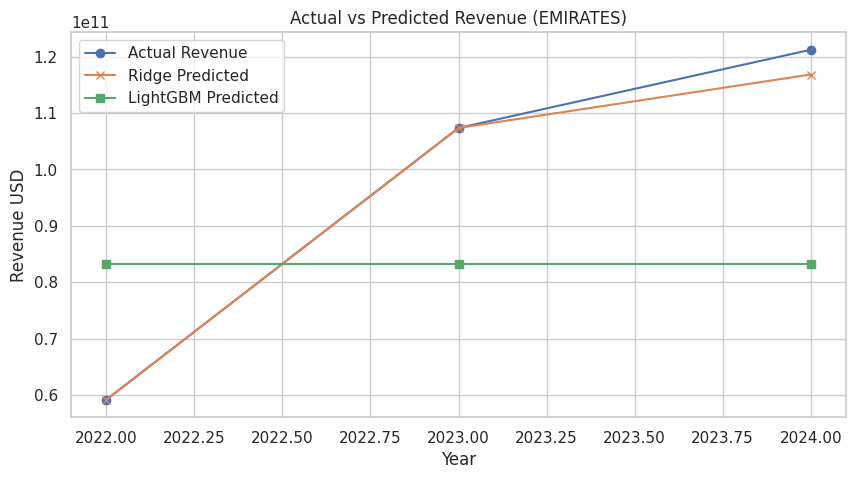


### Forecasted Revenue (Next 3 Years) ###


,airline,year,forecast_revenue_usd
0,EMIRATES,2025,8.326800e+10
1,EMIRATES,2026,8.326800e+10
2,EMIRATES,2027,8.326800e+10
3,PIA,2025,8.291863e+08
4,PIA,2026,8.291863e+08
5,PIA,2027,8.291863e+08
6,SINGAPORE AIRLINES,2025,9.318004e+09
7,SINGAPORE AIRLINES,2026,9.318004e+09
8,SINGAPORE AIRLINES,2027,9.318004e+09
9,TURKISH AIRLINES,2025,1.968400e+10


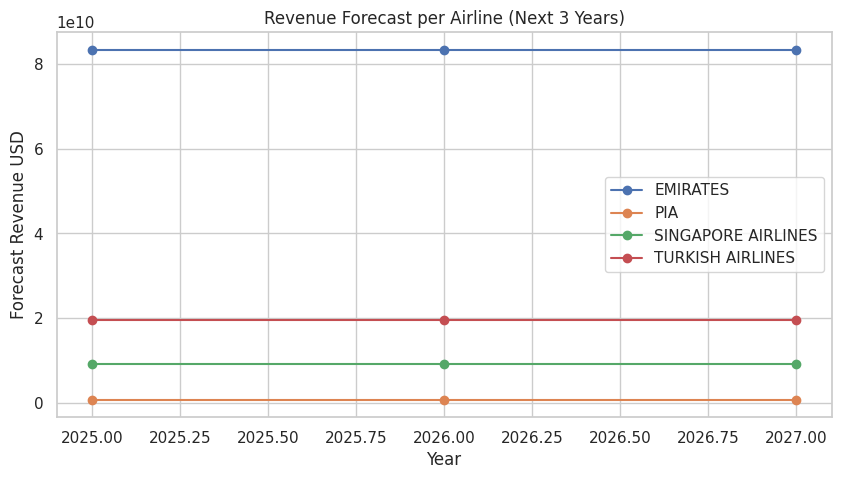


### Marketing Impact Summary ###
                            OLS Regression Results                            
Dep. Variable:            revenue_usd   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                    0.6632
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.617
Time:                        00:46:16   Log-Likelihood:                -262.42
No. Observations:                  12   AIC:                             540.8
Df Residuals:                       4   BIC:                             544.7
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  warnings.warn('covariance of constraints does not have full '


In [62]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 1️⃣ Dataset Summary
print("### Dataset Summary ###")
airline_summary = panel.groupby('Airline').agg(
    years_of_data=('year', 'count'),
    avg_revenue=('revenue_usd', 'mean'),
    max_revenue=('revenue_usd', 'max'),
    min_revenue=('revenue_usd', 'min')
).reset_index()
print(airline_summary)

# Visual: total revenue per airline
plt.figure(figsize=(10,5))
sns.barplot(data=airline_summary, x='Airline', y='avg_revenue', palette='Blues_d')
plt.title("Average Revenue per Airline")
plt.ylabel("Avg Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Feature-engineered panel sample
print("\n### Feature-Engineered Panel Sample ###")
display(panel.head(10))

# 3️⃣ Model Performance Table
print("\n### Model Performance by Airline ###")
perf_table = []
for m in models_info:
    row = {'Airline': m['airline']}
    row.update(m['metrics'])
    perf_table.append(row)
perf_df = pd.DataFrame(perf_table)
display(perf_df)

# Visual: Predicted vs Actual Revenue for first airline
first_airline = models_info[0]['airline']
sub = panel[panel['Airline']==first_airline].sort_values('year')
features = models_info[0]['features']
ridge_model = models_info[0]['ridge']
lgb_model = models_info[0]['lgb']

X = sub[features].dropna() # Drop NaNs before prediction
y = sub['revenue_usd'].loc[X.index] # Align y with cleaned X

y_pred_ridge = ridge_model.predict(X)
y_pred_lgb = lgb_model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(sub.loc[X.index, 'year'], y, label='Actual Revenue', marker='o') # Use cleaned indices for year
plt.plot(sub.loc[X.index, 'year'], y_pred_ridge, label='Ridge Predicted', marker='x')
plt.plot(sub.loc[X.index, 'year'], y_pred_lgb, label='LightGBM Predicted', marker='s')
plt.title(f"Actual vs Predicted Revenue ({first_airline})")
plt.xlabel("Year")
plt.ylabel("Revenue USD")
plt.legend()
plt.show()

# 4️⃣ Forecasts Table
print("\n### Forecasted Revenue (Next 3 Years) ###")
fc_df = pd.DataFrame(forecasts)
display(fc_df)

# Visual: Forecast per airline
plt.figure(figsize=(10,5))
for a in fc_df['airline'].unique():
    tmp = fc_df[fc_df['airline']==a]
    plt.plot(tmp['year'], tmp['forecast_revenue_usd'], label=a, marker='o')
plt.title("Revenue Forecast per Airline (Next 3 Years)")
plt.xlabel("Year")
plt.ylabel("Forecast Revenue USD")
plt.legend()
plt.show()

# 5️⃣ Marketing Impact (if exists)
if MARKET_COL:
    import statsmodels.formula.api as smf
    # Create a copy of the panel for OLS and rename columns to avoid issues with spaces
    panel_for_ols = panel.copy()
    local_market_col_name = MARKET_COL
    if local_market_col_name and ' ' in local_market_col_name:
        new_market_col_for_ols = local_market_col_name.replace(' ', '_')
        panel_for_ols = panel_for_ols.rename(columns={local_market_col_name: new_market_col_for_ols})
        local_market_col_name = new_market_col_for_ols
    formula = f"{TARGET} ~ {local_market_col_name} + lag_1 + lag_2 + lag_3 + C({GROUP_COL})"
    res = smf.ols(formula, data=panel_for_ols.dropna(subset=[TARGET, 'lag_1'])).fit(cov_type='HC3')
    print("\n### Marketing Impact Summary ###")
    print(res.summary())
    coef = res.params.get(local_market_col_name, None)
    print(f"\nEstimated effect of marketing budget on revenue: coef = {coef:.2f} USD per unit of budget")

In [63]:
from google.colab import files
files.download('airline_forecasts.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>